# Exploratory Data Analysis (EDA)

## 1. Introduction to EDA
Exploratory Data Analysis (EDA) is a crucial step in the data analysis process, aimed at understanding the underlying patterns, trends, and relationships in the dataset. It involves visualizing and summarizing data to uncover insights before applying formal modeling techniques.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from data.data_loader import load_diabetes_data

plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-v0_8-whitegrid')

df = load_diabetes_data()
print('\nNumber of rows and columns in the diabetes data set: ', df.shape)
df.head()

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

Number of rows and columns in the diabetes data set:  (442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,12.401656
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,9.292946
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,12.065710
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,14.020046
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,11.856285



## 2. Visualization of Linear Dependence
### **lmplot using Seaborn**
- **Purpose**: To visualize the relationship between two variables.
- **Method**: Utilized the `lmplot` function from Seaborn to plot the independent variable (BMI) against the target variable.
- **Assumption**: Assumed a linear dependence between the independent variable and the target.

```python
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='BMI', y='target', data=df)
plt.title('Linear Dependence between BMI and Target Variable')
plt.show()

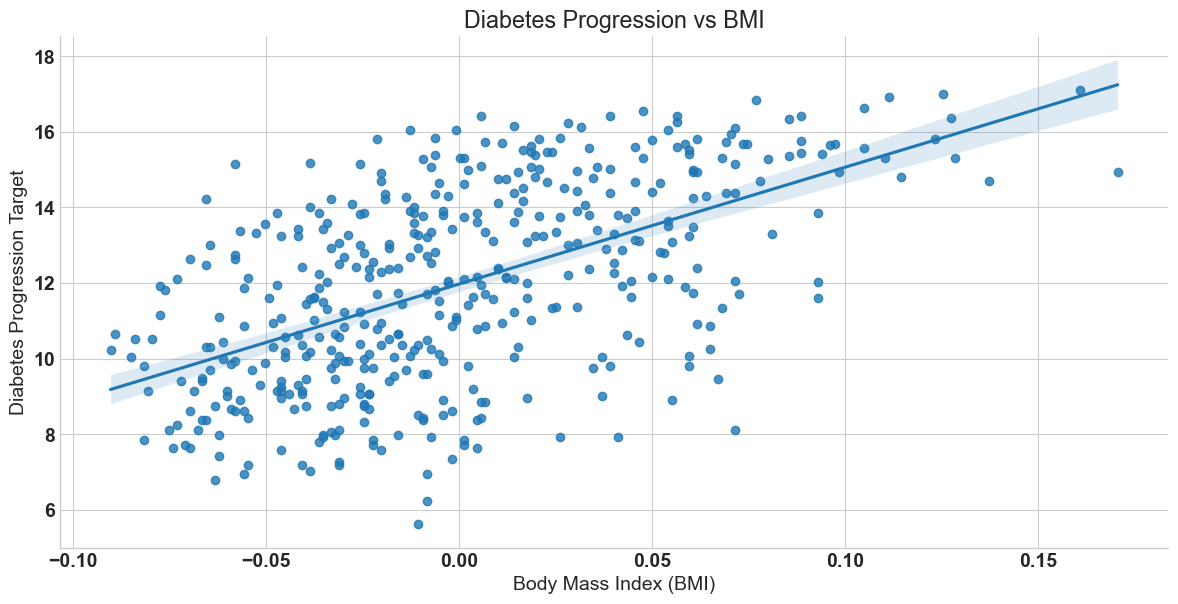

In [2]:
sns.lmplot(x='bmi', y='target', data=df, aspect=2, height=6)
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Progression Target')
plt.title('Diabetes Progression vs BMI')
plt.show()

### **Statistical Summary**
- **Purpose**: To obtain a quick overview of the dataset's statistical properties.
- **Method**: Used `df.describe()` to compute summary statistics such as count, mean, median, standard deviation, and quartiles.

```python
summary_statistics = df.describe()
print(summary_statistics)

In [3]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,11.974574
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,2.612991
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,5.618581
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,9.895566
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,12.048471
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,14.164830
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,17.106426


## 3. Handling Missing Values
### **Heatmap of Missing Values**
- **Purpose**: To identify and visualize missing data within the dataset.
- **Method**: Created a heatmap using `df.isnull()` to easily spot missing values.

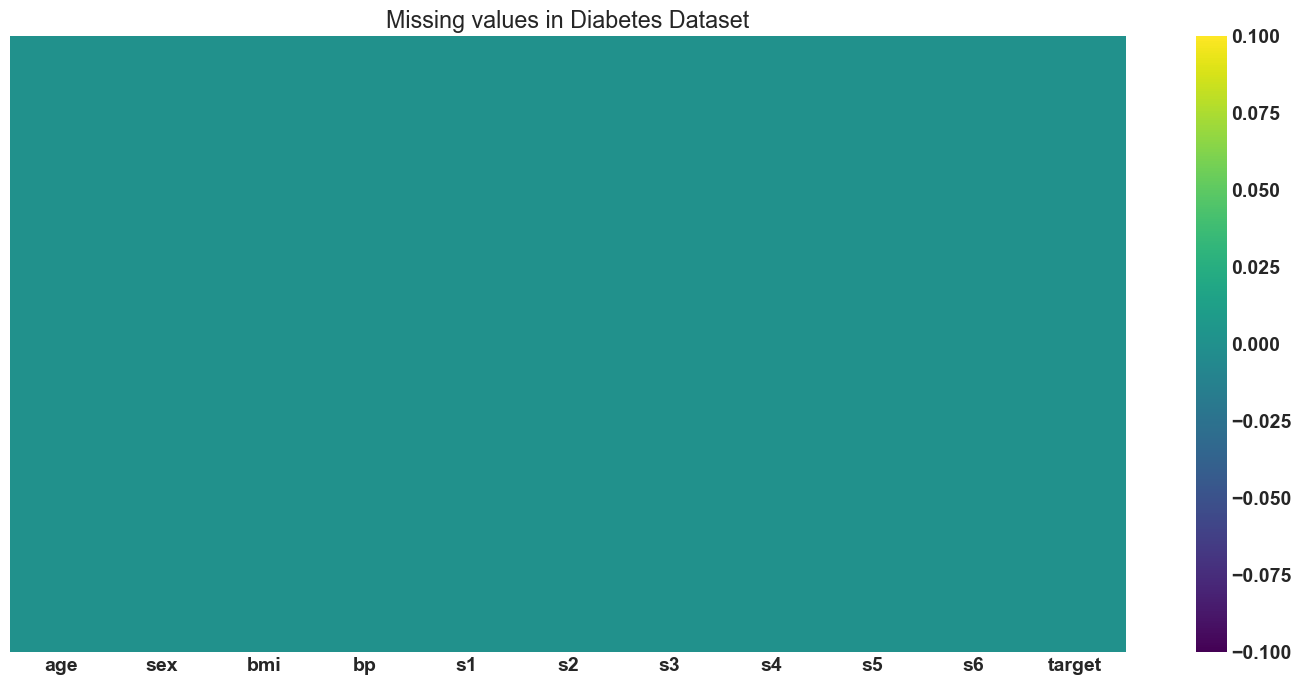

In [4]:
plt.figure(figsize=(18, 8))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis', yticklabels=False)
plt.title('Missing values in Diabetes Dataset')
plt.show()

No missing values in the dataset


## 4. Correlation Heatmap
- **Purpose**: To assess the relationships between pairs of variables.
- **Method**: Drew a heatmap of correlation coefficients to visualize how each feature correlates with the others.

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation_matrix = df.corr()

# Draw heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
corr = df.corr()
plt.figure(figsize=(18,6))
sns.heatmap(corr, cmap='Blues', annot=True)

## 5. Distribution of Target Variable
### **Histplot**
- **Purpose**: 
  - To visualize the distribution of the target variable.
  
- **Observation**: 
  - Noted that the distribution was slightly right-skewed.

### **Transformation Techniques**
Explored various methods to normalize the data:
- **Box-Cox Transformation**: 
  - Useful for stabilizing variance and making the data more normal distribution-like.
  
- **Square Root Transformation**: 
  - Applies the square root function to the data.
  
- **Log Transformation**: 
  - Applies the logarithm to the data, effective for reducing skewness.
  
- **Yeo-Johnson Transformation**: 
  - A generalization of Box-Cox that can handle zero and negative values.


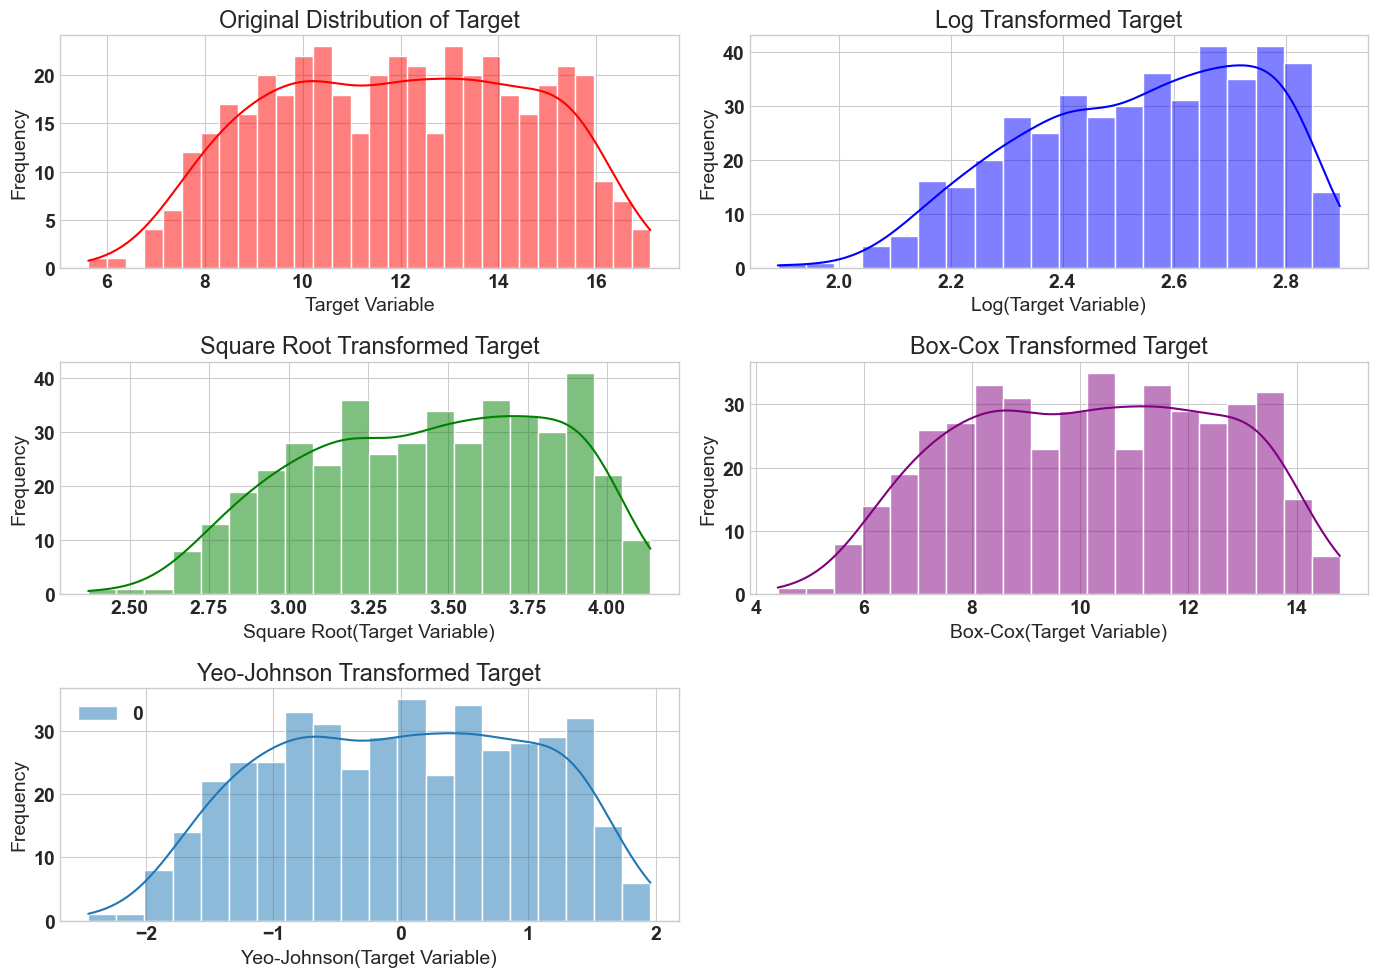

In [6]:

fig, axes = plt.subplots(3, 2, figsize=(14, 10))

log_target = np.log1p(df['target'])

sqrt_target = np.sqrt(df['target'])

boxcox_target, _ = stats.boxcox(df['target'])

pt = PowerTransformer(method='yeo-johnson')
yeo_johnson_target = pt.fit_transform(df[['target']])

sns.histplot(df['target'], bins=30, color='r', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Original Distribution of Target')
axes[0, 0].set_xlabel('Target Variable')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(log_target, bins=20, color='b', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Log Transformed Target')
axes[0, 1].set_xlabel('Log(Target Variable)')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(sqrt_target, bins=20, color='g', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Square Root Transformed Target')
axes[1, 0].set_xlabel('Square Root(Target Variable)')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(boxcox_target, bins=20, color='purple', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Box-Cox Transformed Target')
axes[1, 1].set_xlabel('Box-Cox(Target Variable)')
axes[1, 1].set_ylabel('Frequency')

sns.histplot(yeo_johnson_target, bins=20, color='orange', kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Yeo-Johnson Transformed Target')
axes[2, 0].set_xlabel('Yeo-Johnson(Target Variable)')
axes[2, 0].set_ylabel('Frequency')

fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()

## 6. Analyzing Categorical Variables
### **Violin Plots**
- **Purpose**: To visualize the distribution of continuous data across different categories.
- **Method**: Used violin plots to explore how categorical variables affect the continuous target variable.


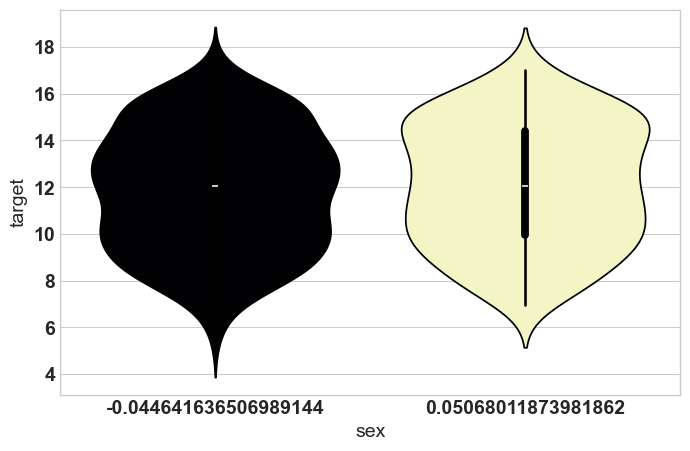

In [7]:
sns.violinplot(x='sex', y='target', data=df, hue='sex', palette='magma', legend=False);

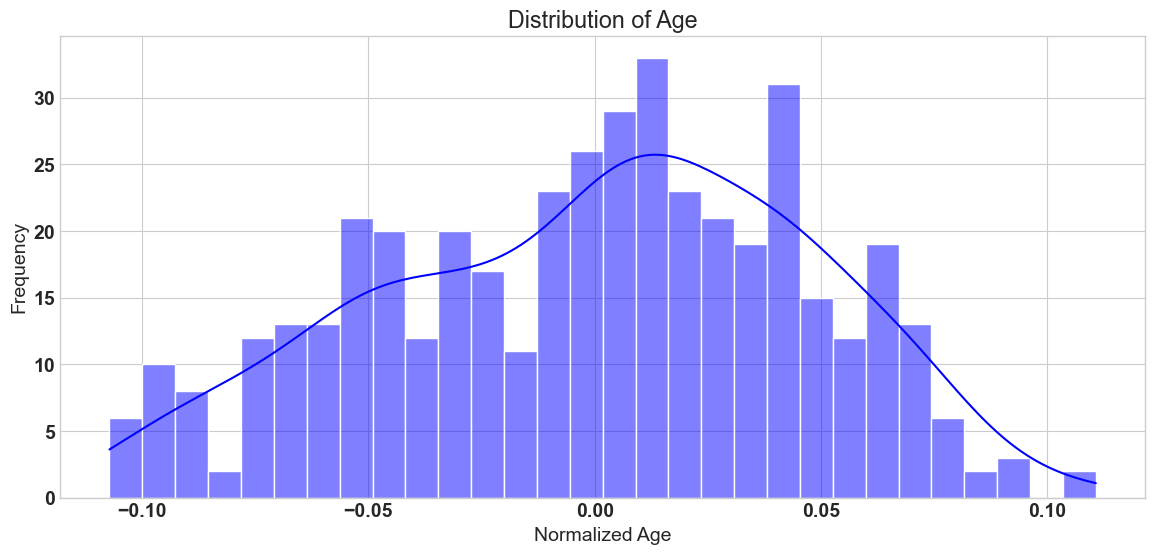

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,12.401656
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,9.292946
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,12.065710
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,14.020046
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,11.856285


In [8]:
plt.figure(figsize=(14, 6))
sns.histplot(df['age'], bins=30, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Normalized Age')
plt.ylabel('Frequency')
plt.show()

df.head()


## 7. Pairplots and Scatter Plots
### **Purpose**
- To visualize relationships between pairs of features in the dataset.

### **Method**
- **Pairplots**: 
  - Utilized Seaborn's pairplot function to create scatter plots for all feature combinations. This allows for an overall view of the relationships between features and can reveal patterns, correlations, and outliers.
  
- **Scatter Plots**:
  - Created scatter plots for specific feature pairs, adding a hue based on the categorical variable (e.g., sex) to differentiate data points. This helps in understanding how different categories influence the relationship between features.


Text(0.5, 1.0, 'Scatter plot of Diabetes Target vs BP')

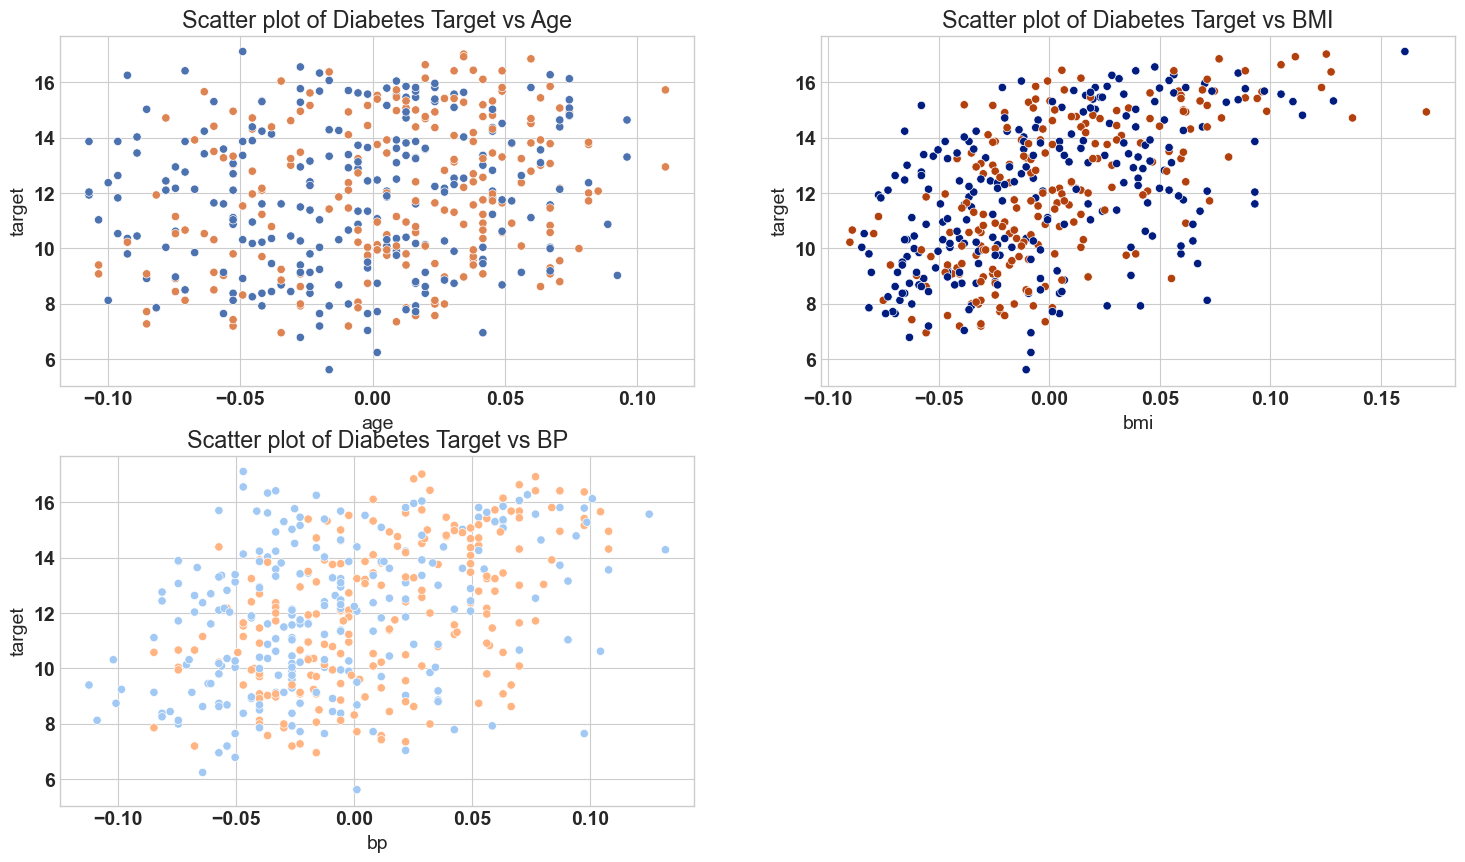

In [9]:

f = plt.figure(figsize=(18,10))

ax = f.add_subplot(221)
sns.scatterplot(x='age', y='target', data=df, palette='deep', hue='sex', legend=False)
ax.set_title('Scatter plot of Diabetes Target vs Age')

ax = f.add_subplot(222)
sns.scatterplot(x='bmi',y='target',data=df,palette='dark',hue='sex',ax=ax, legend=False)
ax.set_title('Scatter plot of Diabetes Target vs BMI')

ax = f.add_subplot(223)
sns.scatterplot(x='bp',y='target',data=df,palette='pastel',hue='sex',ax=ax, legend=False)
ax.set_title('Scatter plot of Diabetes Target vs BP')



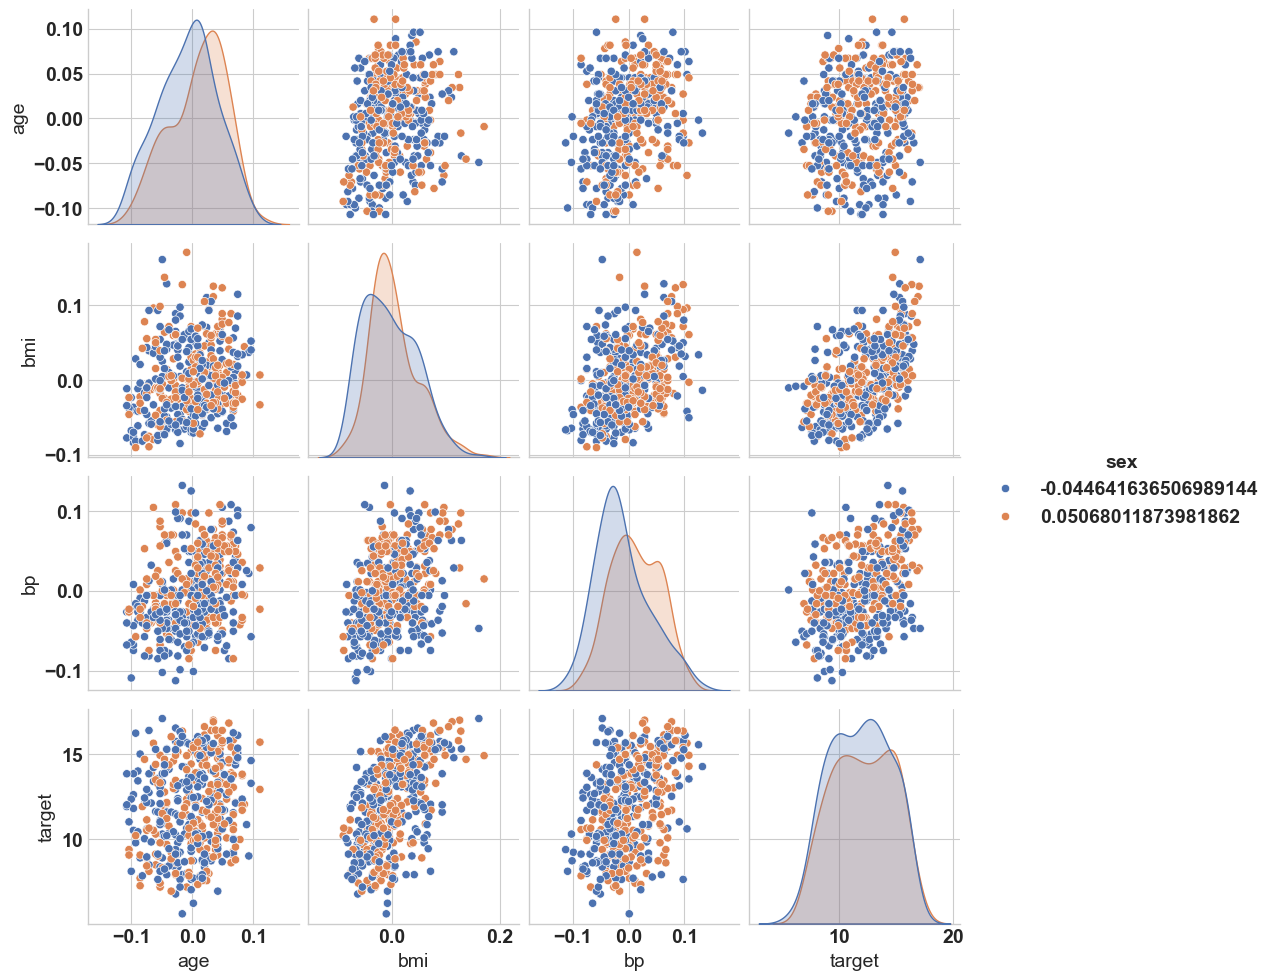

In [10]:
sns.pairplot(df, vars=['age', 'bmi', 'bp', 'target'], palette='deep', hue='sex')
plt.show()
